## Predykcja zaburzeń snu

Celem projektu jest analiza stylu życia danej osoby oraz zmiennych medycznych, takich jak:
wiek, BMI, aktywność fizyczna, czas trwania snu, ciśnienie krwi i wiele innych, w celu przewidzenia
zaburzeń snu i ich rodzaju.

### O zestawie danych

Zestaw danych Sleep Health and Lifestyle składa się z 374 wierszy i 13 kolumn, obejmujących
szeroki zakres zmiennych związanych ze snem i codziennymi nawykami. Obejmuje on takie szczegóły, jak
płeć, wiek, zawód, czas trwania snu, jakość snu, poziom aktywności fizycznej, poziom
stresu, kategoria BMI, ciśnienie krwi, tętno, codzienne kroki oraz obecność lub brak
zaburzeń snu.

### Kluczowe cechy zestawu danych:

<ul>
<li>Kompleksowe wskaźniki snu: Poznaj czas trwania snu, jego jakość i czynniki wpływające na wzorce snu.</li>
<li>Czynniki związane ze stylem życia: Przeanalizuj poziom aktywności fizycznej, poziom stresu i kategorie BMI.</li>
<li>Zdrowie układu sercowo-naczyniowego: Przeanalizuj pomiary ciśnienia krwi i tętna.</li>
<li>Analiza zaburzeń snu: Określ występowanie zaburzeń snu, takich jak bezsenność</li>
i bezdech senny.
</ul>

### Słownik danych

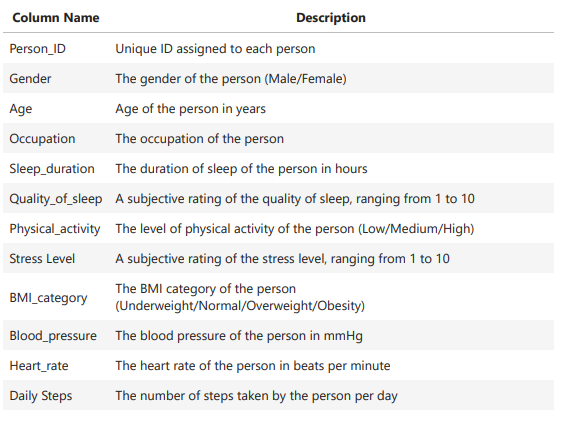
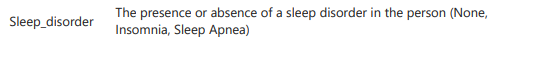

### Szczegóły dotyczące kolumny Zaburzenia Snu:

<ul>
    <li>Brak: Osoba nie wykazuje żadnych specyficznych zaburzeń snu.</li>
    <li>Bezsenność: Osoba ma trudności z zasypianiem lub utrzymaniem snu,
co prowadzi do niewystarczającego lub złej jakości snu.</li>
    <li>Bezdech senny: Osoba cierpi na przerwy w oddychaniu podczas snu, co powoduje
        zaburzenia wzorców snu i potencjalne zagrożenia dla zdrowia.</li>
</ul>

In [72]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data Preprocessing Część 1

In [77]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [79]:
df.shape

(374, 13)

In [81]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [83]:
df['Sleep Disorder'].fillna('None', inplace=True)

C:\Users\cris3\AppData\Local\Temp\ipykernel_37236\596664643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None', inplace=True)


Wartość nan/None w zaburzeniach snu oznacza brak zaburzeń snu, więc nie jest to wartość brakująca.

In [86]:
df.drop('Person ID',axis=1,inplace=True)

In [88]:
print('Wartości unikatowe dla każdej z kolumn:')
for col in df.columns:
    print(col,df[col].nunique())

Wartości unikatowe dla każdej z kolumn:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


### Podział ciśnienia krwi na skurczowe i rozkurczowe

In [91]:
df['systolic_bp']=df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp']=df['Blood Pressure'].apply(lambda x: x.split('/')[1])

df.drop('Blood Pressure',axis=1,inplace=True)

### Sprawdzanie unikalnych wartości z każdej kolumny kategorycznej

In [94]:
cols=['Occupation','BMI Category','Sleep Disorder']
for col in cols:
    print(col,df[col].unique())

Occupation ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Sleep Disorder ['None' 'Sleep Apnea' 'Insomnia']


In [150]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight','Normal')

## Eksploracyjna analiza danych

EDA dzieli się na dwie fazy:

Faza 1: Zrozumienie danych poprzez wykreślenie ich zmiennych

Faza 2: Zrozumienie korelacji między zmiennymi
### Faza 1

<Axes: xlabel='Sleep Disorder', ylabel='count'>

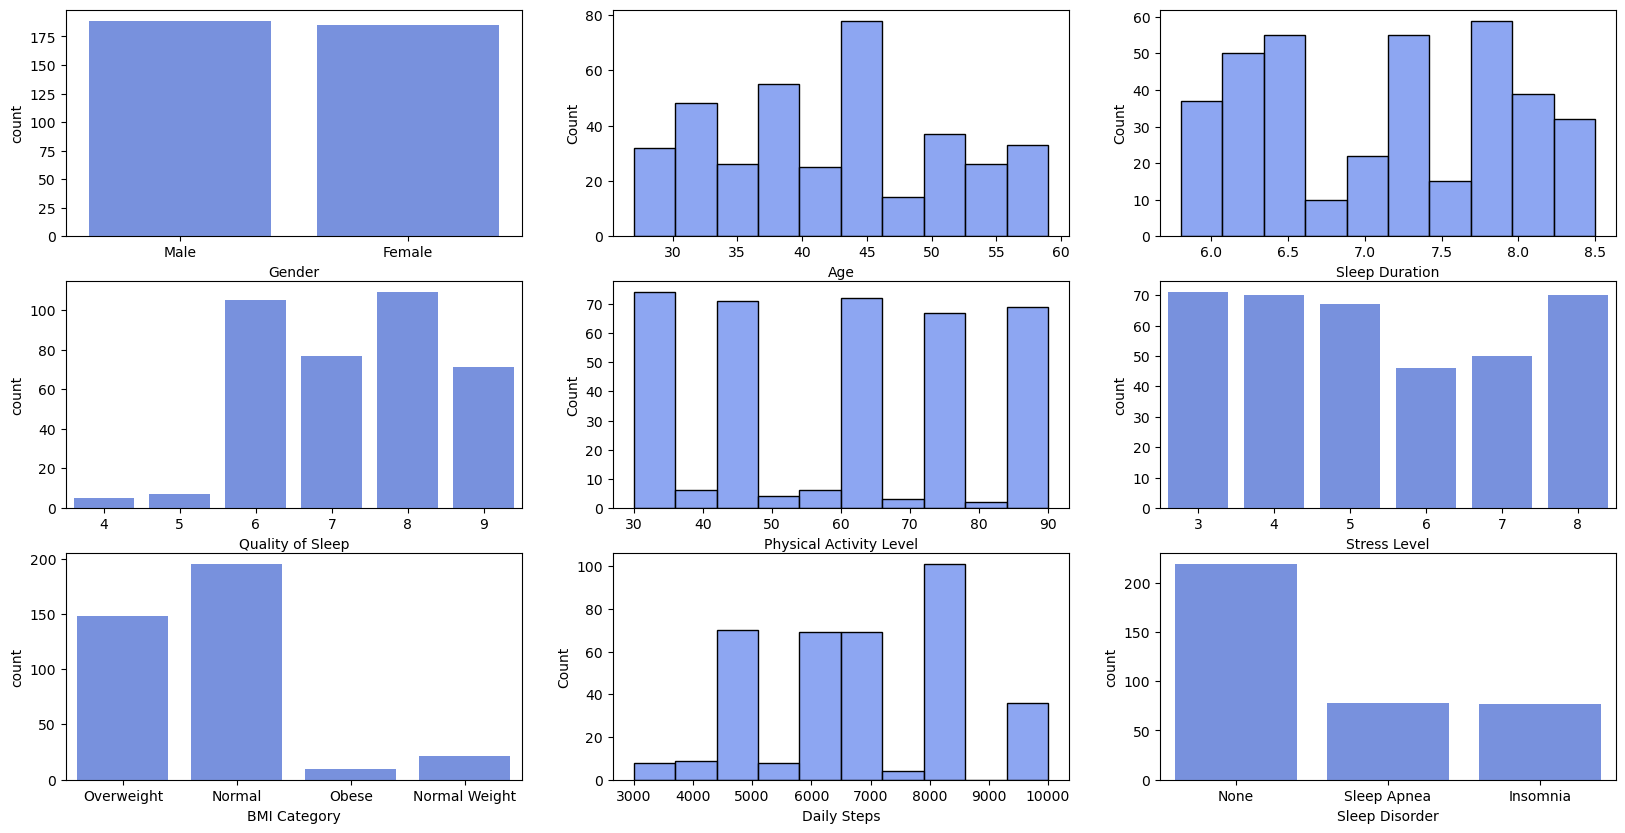

In [134]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x='Age',data=df,ax=ax[0,1],bins=10)
sns.histplot(x='Sleep Duration',data=df,ax=ax[0,2],bins=10)
sns.countplot(x='Quality of Sleep',data=df,ax=ax[1,0])
sns.histplot(x='Physical Activity Level',data=df,ax=ax[1,1],bins=10)
sns.countplot(x='Stress Level',data=df,ax=ax[1,2])
sns.countplot(x='BMI Category',data=df,ax=ax[2,0])
sns.histplot(x='Daily Steps',data=df,ax=ax[2,1],bins=10)
sns.countplot(x='Sleep Disorder',data=df,ax=ax[2,2])

Liczba mężczyzn i kobiet jest prawie równa, z czego większość osób
ma od 30 do 45 lat. Większość osób ma jakość snu większą niż 5,
co oznacza, że ​​śpią wystarczająco. Ponadto większość osób ma
normalne BMI, co bezpośrednio wiąże się z rozkładem zaburzeń snu, który pokazuje
równą liczbę osób z zaburzeniami snu i bez nich.

### Faza 2

### Płeć i zaburzenia snu

<Axes: xlabel='Gender', ylabel='count'>

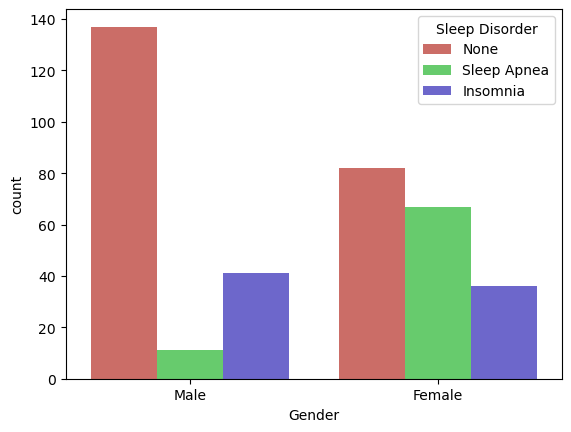

In [139]:
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder')

Większość mężczyzn i kobiet nie cierpi na żadne zaburzenia snu. Jednak
kobiety mają tendencję do częstszego występowania zaburzeń snu w porównaniu do mężczyzn. Liczba kobiet
cierpiących na bezdech senny jest dość wysoka w porównaniu do mężczyzn. Ale w przeciwieństwie do tego,
większa liczba mężczyzn cierpi na bezsenność w porównaniu do kobiet.

### Wpływ zawodu na zaburzenia snu

C:\Users\cris3\AppData\Local\Temp\ipykernel_37236\360875477.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

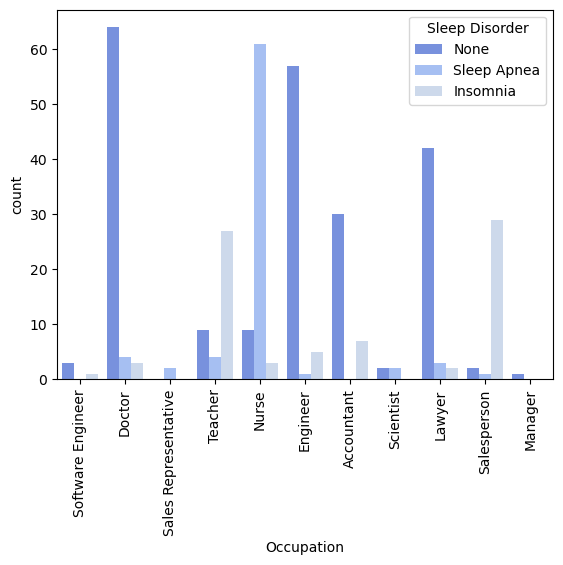

In [143]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

Z wykresu jasno wynika, że ​​zawód ma ogromny wpływ na zaburzenia snu.
Pielęgniarki są bardziej narażone na bezdech senny w porównaniu z innymi zawodami i
bardzo niewielu z nich nie ma zaburzeń snu. Po pielęgniarkach, kolejnym najbardziej dotkniętym zawodem
jest sprzedawca, który jest najbardziej dotknięty bezsennością, a następnie
nauczyciele. Jednak są pewne zawody, w których większość ludzi ma bardzo mało
przypadków bezdechu sennego i bezsenności, takie jak inżynierowie, lekarze, księgowi, prawnicy.
Inżynierów oprogramowania i menedżerów jest tak mało, że nie mogę wiele powiedzieć na ten temat,
ale zawód przedstawiciela handlowego wykazał tylko bezdech senny i nie
bezsenność lub brak zaburzeń snu.

### BMI i zaburzenia snu 

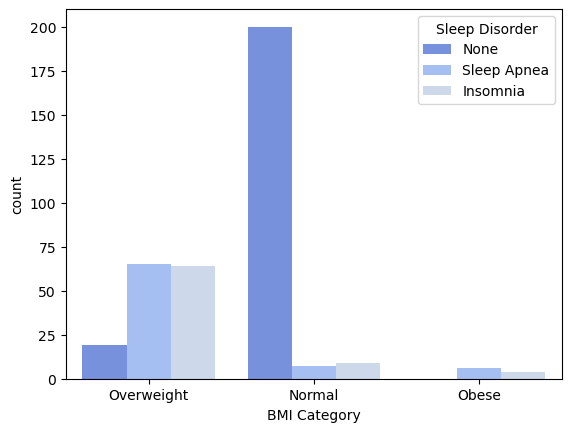

In [152]:
ax = sns.countplot(x = 'BMI Category', data = df, hue = 'Sleep Disorder')

Osoby z prawidłowym BMI rzadziej cierpią na zaburzenia snu. Jednakże w przypadku osób z nadwagą i otyłością jest
odwrotnie. Osoby z nadwagą częściej cierpią
na zaburzenia snu niż osoby otyłe.

## Data Preprocessing Część 2

### Label Encoding

In [157]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [159]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
 label_encoder.fit(df[i].unique())
 df[i] = label_encoder.transform(df[i])
 print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


### Macierz koleracji 

<Axes: >

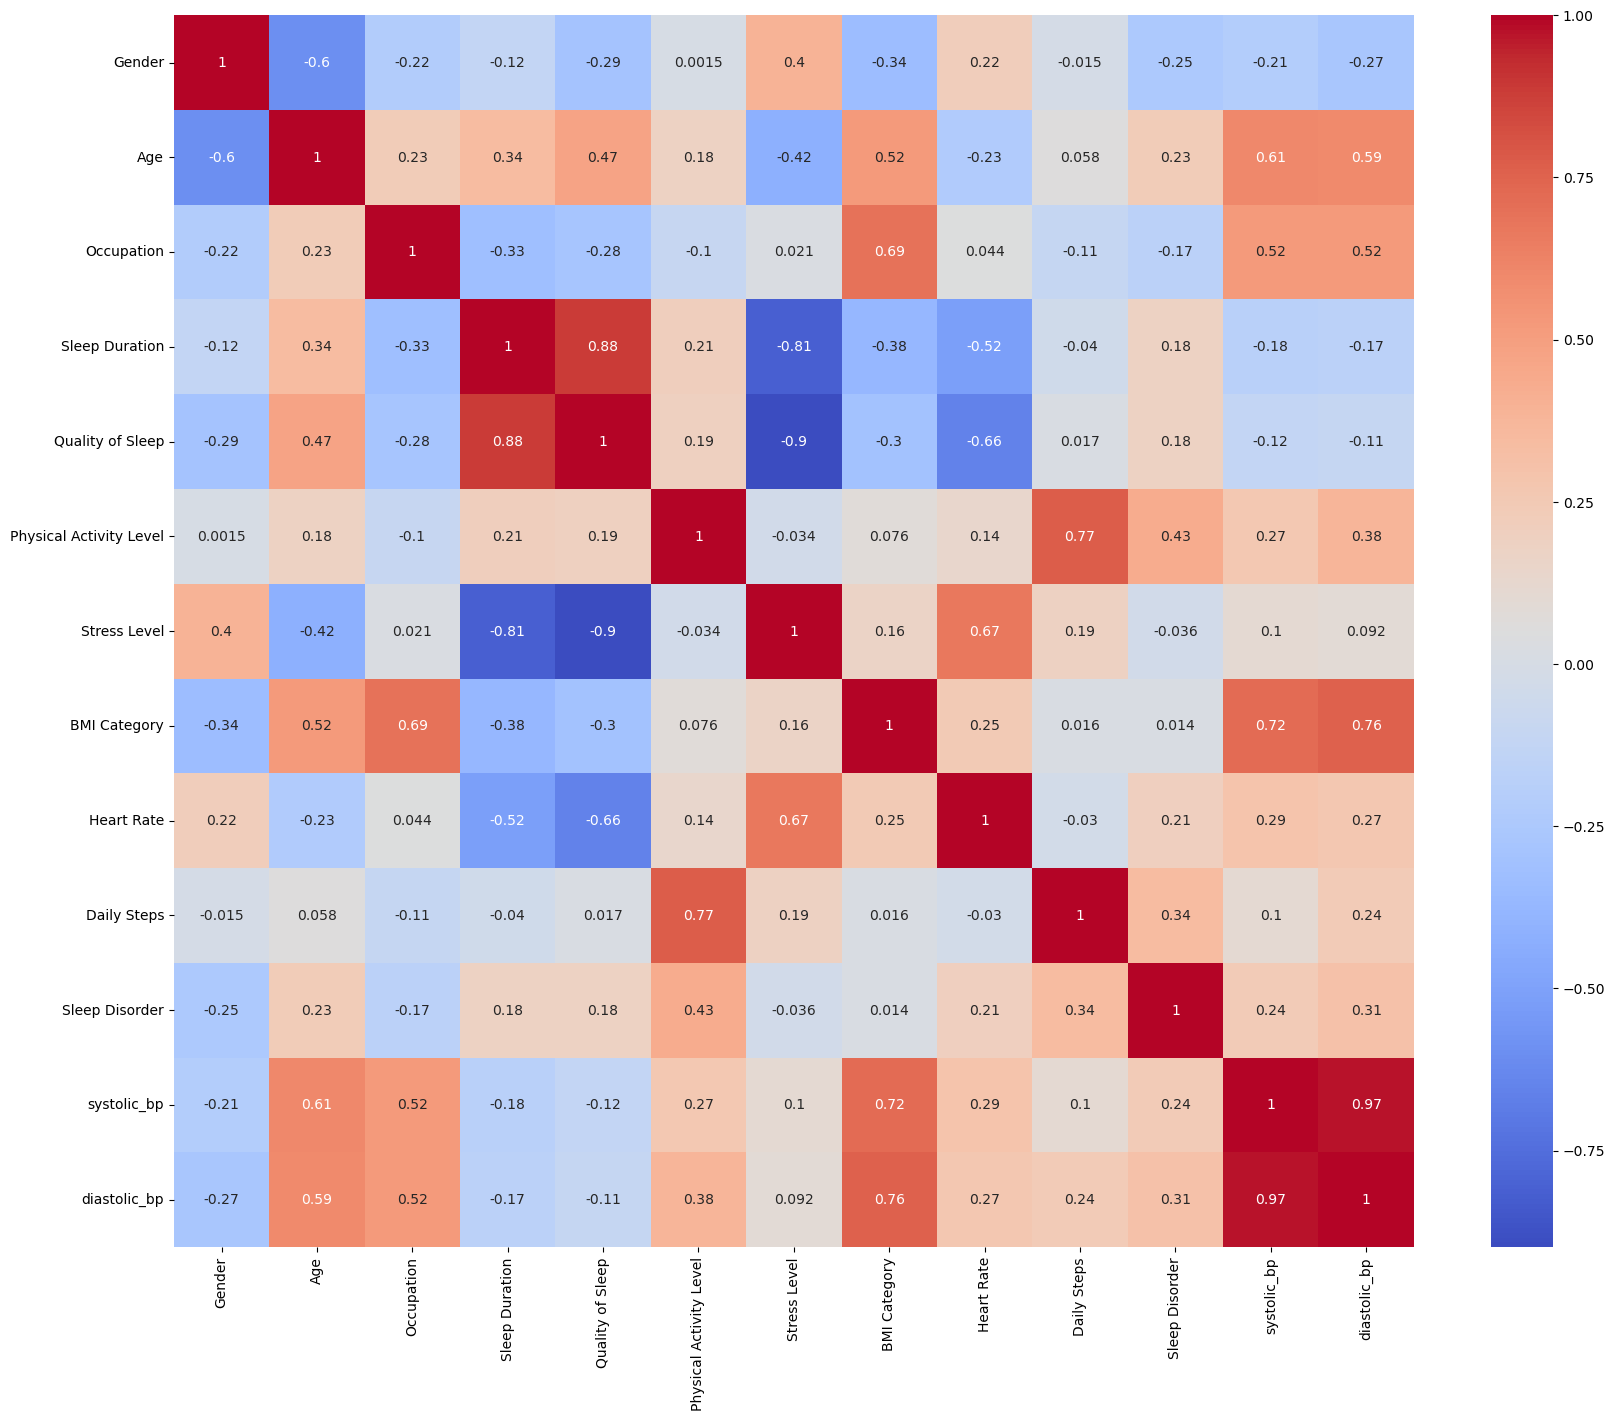

In [162]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

### Train test split

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis=1),df['Sleep Disorder'],test_size=0.2)

### Model Building

Do przewidywania zaburzeń snu za pomocą algorytmów klasyfikacyjnych użyję
następujących algorytmów:
1. Decision Tree Classifier
2. Random Forest Classifier

### Decision Tree Classifier

In [171]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [173]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [177]:
dtree.score(X_test,y_test)

0.8666666666666667

### Decision Tree Model Evalution

In [182]:
d_pred = dtree.predict(X_test)
d_pred

array([2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0,
       0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 0])

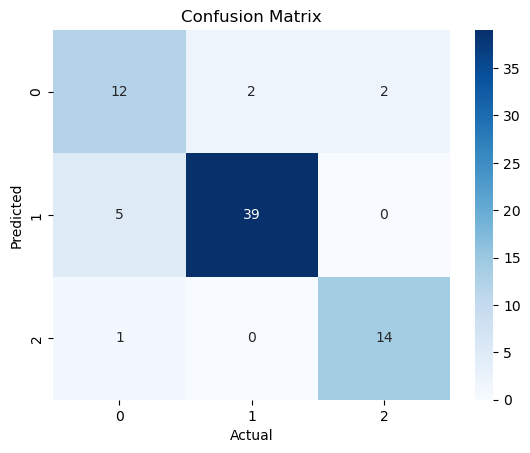

In [184]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Pola diagonalne pokazują liczbę prawdziwie pozytywnych wyników, tj. prawidłowych przewidywań dokonanych przez
model. Pola poza diagonalą pokazują liczbę fałszywie pozytywnych wyników, tj. nieprawidłowych przewidywań dokonanych przez
model.

### Wykres rozkładu wartości przewidywanych i rzeczywistych

C:\Users\cris3\AppData\Local\Temp\ipykernel_37236\174176785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\cris3\AppData\Local\Temp\ipykernel_37236\174176785.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

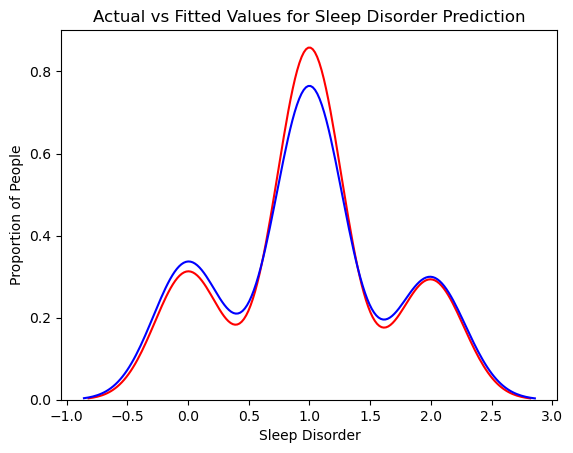

In [192]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

Rzeczywiste wartości są przedstawione na czerwono, a przewidywane na niebiesko. Jak pokazano na
wykresie, przewidywania modelu są w stanie podążać za krzywą rzeczywistych wartości, ale
przewidywane wartości nadal różnią się od rzeczywistych. Dlatego model nie jest w stanie
dokładnie przewidzieć wartości.

#### Classification Report

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.95      0.89      0.92        44
           2       0.88      0.93      0.90        15

    accuracy                           0.87        75
   macro avg       0.83      0.86      0.84        75
weighted avg       0.88      0.87      0.87        75



Model daje całkiem przyzwoite wyniki z dokładnością 87% i średnią oceną F1 0,83. Model jest w stanie przewidzieć zaburzenia snu z dobrą dokładnością.

### Random Forest Classifier

In [200]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [202]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [204]:
rfc.score(X_test,y_test)

0.8933333333333333

### Random Forest Classifier Evaluation

In [210]:
rfc_pred = rfc.predict(X_test)
rfc_pred


array([2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0,
       0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 0])

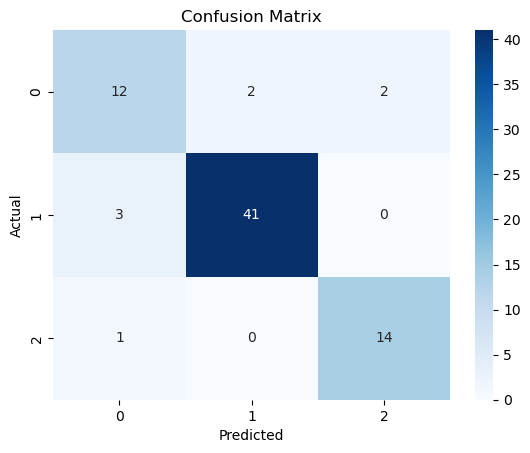

In [212]:
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model klasyfikatora losowego lasu ma większą dokładność niż model klasyfikatora drzewa decyzyjnego. Pola diagonalne liczą prawdziwe wyniki pozytywne, tj. prawidłowe przewidywania,
podczas gdy pola poza diagonalą pokazują liczbę wyników fałszywie pozytywnych, tj. nieprawidłowych przewidywań dokonanych przez model. Ponieważ liczba wartości fałszywie pozytywnych jest mniejsza, pokazuje to,
że model jest dobry w przewidywaniu prawidłowych wyników.

### Wykres rozkładu wartości przewidywanych i rzeczywistych

C:\Users\cris3\AppData\Local\Temp\ipykernel_37236\750068266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\cris3\AppData\Local\Temp\ipykernel_37236\750068266.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

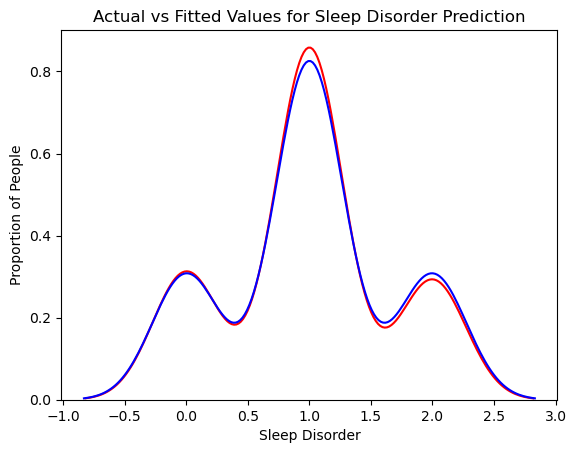

In [216]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

Klasyfikator lasu losowego ma większą dokładność w porównaniu do drzewa decyzyjnego,
co widać na przykładzie luki między wartościami rzeczywistymi i przewidywanymi, która była większa
w przypadku klasyfikatora drzewa decyzyjnego.

#### Classification Report

In [225]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.95      0.93      0.94        44
           2       0.88      0.93      0.90        15

    accuracy                           0.89        75
   macro avg       0.86      0.87      0.87        75
weighted avg       0.89      0.89      0.89        75



Model Random Forest Classifier ma dokładność 89% i średni wynik F1 wynoszący
0,86. Z metryk jasno wynika, że ​​model jest w stanie przewidzieć zaburzenia snu,
dość skutecznie, z większą dokładnością niż Decision Tree Classifer.

## Konkulzja

Na podstawie analizy danych eksploracyjnych doszedłem do wniosku, że kolejność snu zależy od
trzech głównych czynników, którymi są płeć, zawód i BMI pacjenta. Mężczyźni mają
więcej przypadków bezsenności, podczas gdy kobiety mają więcej przypadków bezdechu sennego. Ponadto osoby wykonujące zawód taki jak pielęgniarki są bardziej podatne na
zaburzenia snu. BMI pacjenta odgrywa również istotną rolę w przewidywaniu
zaburzeń snu. Pacjenci, którzy są otyli lub mają nadwagę, są bardziej podatni na
zaburzenia snu.

Przechodząc do modeli klasyfikacji, oba modele wypadły całkiem nieźle, jednak
klasyfikator losowego lasu ma doskonałe wyniki z dokładnością 89%.